<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-предобработка--данных-из-файла" data-toc-modified-id="Изучение-и-предобработка--данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и предобработка  данных из файла</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общая-выручка-по-типу-рекламы" data-toc-modified-id="Общая-выручка-по-типу-рекламы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая выручка по типу рекламы</a></span></li><li><span><a href="#Распределение-средних-eCPM-пользователей,-в-зависимости-от-форматов-рекламы" data-toc-modified-id="Распределение-средних-eCPM-пользователей,-в-зависимости-от-форматов-рекламы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение средних eCPM пользователей, в зависимости от форматов рекламы</a></span></li><li><span><a href="#Распределение-eCPM-по-городам,-версиям-ОС" data-toc-modified-id="Распределение-eCPM-по-городам,-версиям-ОС-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределение eCPM по городам, версиям ОС</a></span><ul class="toc-item"><li><span><a href="#Распределение-eCPM-по-городам" data-toc-modified-id="Распределение-eCPM-по-городам-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Распределение eCPM по городам</a></span></li><li><span><a href="#Распределение-eCPM-по-версиям-ОС" data-toc-modified-id="Распределение-eCPM-по-версиям-ОС-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Распределение eCPM по версиям ОС</a></span></li></ul></li><li><span><a href="#Распределение-выручки-по-городам,-версиям-ОС" data-toc-modified-id="Распределение-выручки-по-городам,-версиям-ОС-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение выручки по городам, версиям ОС</a></span><ul class="toc-item"><li><span><a href="#Распределение-выручки-по-версии-ОС" data-toc-modified-id="Распределение-выручки-по-версии-ОС-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Распределение выручки по версии ОС</a></span></li><li><span><a href="#Распределение-выручки-по-городам" data-toc-modified-id="Распределение-выручки-по-городам-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Распределение выручки по городам</a></span></li></ul></li><li><span><a href="#Распределения-еCPM-по-времени-дня" data-toc-modified-id="Распределения-еCPM-по-времени-дня-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Распределения еCPM по времени дня</a></span></li></ul></li></ul></div>

 # Исследование показов рекламы в мобильной игре

Необходимо провести исследование показов рекламы с целью понять на сколько отличается eCPM в зависимости от географии (города) юзера, версии ОС и других параметров.

1. Для каждого формата рекламы: 
* построить распределение средних eCPM юзеров
* построить распределение eCPM по городам, версиям ОС
* построить распределение доходов по городам, версиям ОС
2. 
3. Описать наблюдения и вывод по исследованию.
4. Дополнительно исследовать:
* Какой процент доходов содержит информацию о городе юзера
* Зависит ли eCPM от времени дня

**Описание данных:**

Сsv файл, с вложенной таблицей формата json, содержаший информацию о показах рекламы для юзеров США 

`profile_id` – id юзера

`event_json` - содержит данные о событии показа рекламы:

`ad_type` – формат рекламы (int, banner или rv)

`placement` – когда/где был показ рекламы в игре

`view_index` – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)

`revenue` – доход от конкретного показа рекламы (eCPM = revenue * 1000)

`ads_ltv` – накапливающийся доход от рекламы, равен сумме всех revenue юзера

`network_name` – рекламная сеть, от которой был показ

Форматы показов рекламы:

* int – полноэкранная реклама; 
* banner – горизонтальный баннер, висит внизу экрана пока юзер играет; 
* rv – видео, которое юзер смотрит по желанию и за просмотр получает монетки или др. ресурсы

## Изучение и предобработка  данных из файла

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:/Users/Home/datasets/us_events_ad_revenue_filtered_03.02-07.02.csv')

In [3]:
def show(df):
    for i in [df]:
        display(df.head())
        df.info()
        display(df.isna().sum())#функция для получения информации о датафрейме

In [4]:
show(df)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_json                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
dtype: int64

In [5]:
df.duplicated().sum()#явные дубликаты

0

Распакуем вложенную таблицу

In [6]:
event_json = df['event_json']

In [7]:
def nze(event_json):
    my_details_dict = []
    for row in event_json:        
        my_details_dict.append(json.loads(row))
    return my_details_dict  #функция для десериализации JSON

In [8]:
event_json = nze(event_json)

In [9]:
event_json = pd.json_normalize(event_json) #нормализуем данные JSON 

In [10]:
show(event_json)

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_type               860079 non-null  object 
 1   placement             860079 non-null  object 
 2   view_index            860079 non-null  int64  
 3   session_view_index    860079 non-null  int64  
 4   cur_ticks             860079 non-null  int64  
 5   session_length        860079 non-null  float64
 6   revenue               860079 non-null  float64
 7   ads_ltv               860079 non-null  float64
 8   ecpm_sma              860079 non-null  float64
 9   normalized_ecpm_sma   860079 non-null  float64
 10  value                 860079 non-null  float64
 11  currency              860079 non-null  object 
 12  ad_country_code       860079 non-null  object 
 13  network_name          860079 non-null  object 
 14  ad_unit_id            860079 non-null  object 
 15  

ad_type                 0
placement               0
view_index              0
session_view_index      0
cur_ticks               0
session_length          0
revenue                 0
ads_ltv                 0
ecpm_sma                0
normalized_ecpm_sma     0
value                   0
currency                0
ad_country_code         0
network_name            0
ad_unit_id              0
ad_network_placement    0
creativeId              0
dtype: int64

In [11]:
event_json.duplicated().sum()#явные дубликаты

3

In [12]:
event_json[event_json.duplicated(keep=False)].index #индексы дубликатов

Int64Index([163426, 163427, 163428, 163429, 531954, 531963], dtype='int64')

In [13]:
combined = df.drop(['event_json'], axis = 1).join(event_json)#объеденим датафреймы

In [14]:
show(combined)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   profile_id               860065 non-null  object 
 1   os_version               860079 non-null  object 
 2   device_manufacturer      860079 non-null  object 
 3   device_model             860079 non-null  object 
 4   device_type              860079 non-null  object 
 5   device_locale            860079 non-null  object 
 6   event_name               860079 non-null  object 
 7   event_datetime           860079 non-null  object 
 8   event_timestamp          860079 non-null  int64  
 9   event_receive_datetime   860079 non-null  object 
 10  event_receive_timestamp  860079 non-null  int64  
 11  connection_type          860079 non-null  object 
 12  operator_name            841200 non-null  object 
 13  country_iso_code         860079 non-null  object 
 14  city

profile_id                     14
os_version                      0
device_manufacturer             0
device_model                    0
device_type                     0
device_locale                   0
event_name                      0
event_datetime                  0
event_timestamp                 0
event_receive_datetime          0
event_receive_timestamp         0
connection_type                 0
operator_name               18879
country_iso_code                0
city                       323708
ad_type                         0
placement                       0
view_index                      0
session_view_index              0
cur_ticks                       0
session_length                  0
revenue                         0
ads_ltv                         0
ecpm_sma                        0
normalized_ecpm_sma             0
value                           0
currency                        0
ad_country_code                 0
network_name                    0
ad_unit_id    

In [15]:
combined['ad_country_code'].value_counts()[1:].sum() 
#количество ad_country_code с меткой не из US, около 0,01%,

117

In [16]:
combined.loc[df.index.isin(event_json[event_json.duplicated(keep=False)].index)].head(2)
# дубликаты таблицы event_json полсе объеденения таблиц

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
163426,JLr3Qr9dydo,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,2022-02-05 04:14:09,1644023649,2022-02-05 04:14:28,...,0.944953,2.020645,2.020645,0.002021,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CODYwZSq5_UCFREFigMdoygPKQ
163427,JLr3Qr9dydo,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,2022-02-05 04:14:18,1644023658,2022-02-05 04:14:28,...,0.946974,2.020645,2.020645,0.002021,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/4884242584,CPXO066x5_UCFScGigMdvCwIgQ


In [17]:
combined.duplicated().sum()#явные дубликаты объединенной таблицы

0

In [18]:
miss_value=pd.DataFrame(combined.isna().mean()).reset_index()
miss_value.set_axis(['column_name', 'missing_value'], axis = 'columns', inplace = True)
miss_value.sort_values(by='missing_value', ascending=False).style.format({'missing_value': '{:,.4%}'.format})
#проценты пропусков

,column_name,missing_value
14,city,37.6370%
12,operator_name,2.1950%
0,profile_id,0.0016%
23,ecpm_sma,0.0000%
19,cur_ticks,0.0000%
20,session_length,0.0000%
21,revenue,0.0000%
22,ads_ltv,0.0000%
24,normalized_ecpm_sma,0.0000%
17,view_index,0.0000%


В объединенном датафрейме 32 колонки, 860079 строк. Проведена проверка на явные и неявные дубликаты, в том числе с учетом регистра. Обнаружено 3 дубликата в event_json, при присоединии основной таблицы, отличающиеся временными меткамами, наличием/отстутствием города юзера, обнаружены 117 пользователей с ad_country_code не US, оставлены как не влиящие на общую картину. Обнаружено 14 пропусков в столбце profile_id, 18879 в operator_name, 323708 в city. 62.4% дохода содержат информацию о городе пользователя.

## Исследовательский анализ данных

###  Общая выручка по типу рекламы

,ad_type,revenue
1,int,1361.952967
0,banner,607.184041
2,rv,421.661652


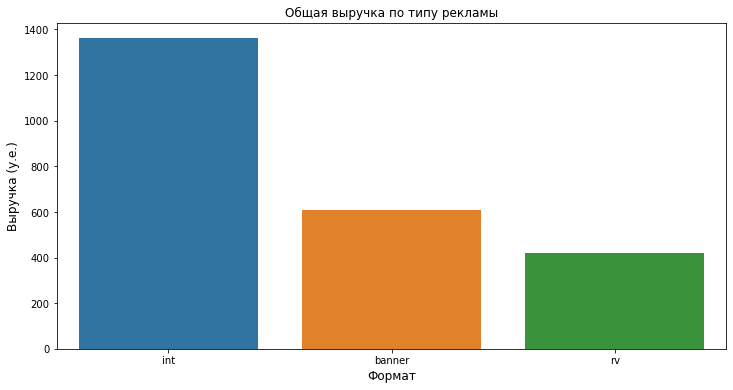

In [19]:
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='ad_type', y='revenue', data=combined.groupby('ad_type').agg({'revenue': 'sum'})
            .reset_index().sort_values(by='revenue', ascending=False))
plt.xlabel('Формат',fontsize=12)
plt.ylabel('Выручка (у.е.)',fontsize=12)
plt.title('Общая выручка по типу рекламы');
combined.groupby('ad_type').agg({'revenue': 'sum'}).reset_index().sort_values(by='revenue', ascending=False)
# общая сумма выручки по формату рекламы 

### Распределение средних eCPM пользователей, в зависимости от форматов рекламы

In [20]:
users = (combined.groupby(['ad_type', 'profile_id'])
         .agg({'revenue': 'mean'})*1000).reset_index().rename(columns={'revenue': 'eCPM'})
users.sample(3)#сгруппируем по формату рекламы и пользователям

,ad_type,profile_id,eCPM
1931,banner,JLtNhjZ8KOt,0.339138
5242,int,JLrYQ29SVmh,15.186312
641,banner,JLhKxWJdRHV,0.659490


Посморим на графики распределения eCPM пользователей по формату рекламы

In [21]:
users_int = users.query('ad_type == "int"')
users_rv = users.query('ad_type == "rv"')
users_banner = users.query('ad_type == "banner"')

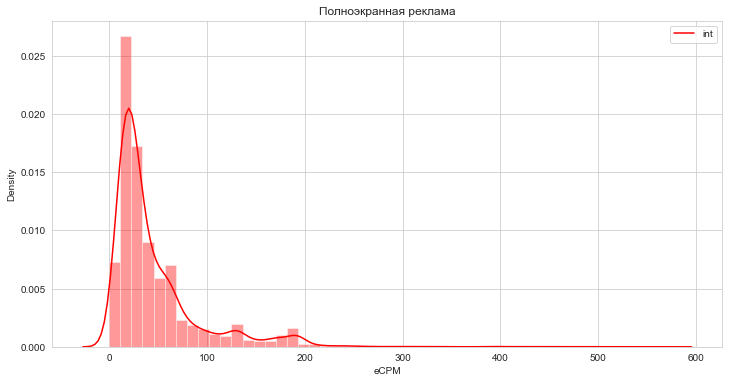

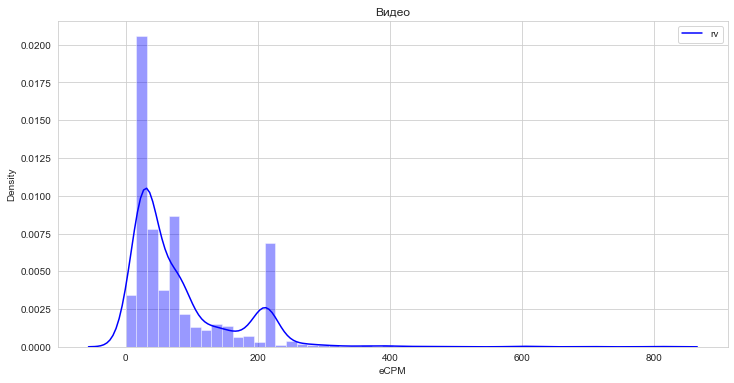

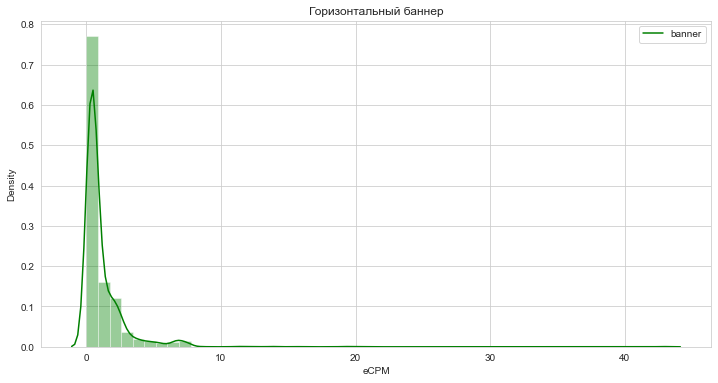

In [22]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(users_int['eCPM'], color='red')
plt.title('Полноэкранная реклама')
plt.legend(['int'])
plt.show()
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(users_rv['eCPM'], color='blue')
plt.title('Видео')
plt.legend(['rv'])
plt.show()
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(users_banner['eCPM'], color='green')
plt.title('Горизонтальный баннер')
plt.legend(['banner'])
plt.show()

На графиках видны аномальные пики, выбросы, графики скошены вправо. Посмотрим на редкие, выбивающихся значения, определим границы для аномалий и удалим их.

Баннеры

,eCPM
count,3508.000000
mean,1.157111
std,1.867792
min,0.013930
25%,0.322804
50%,0.583002
75%,1.297329
max,43.021387


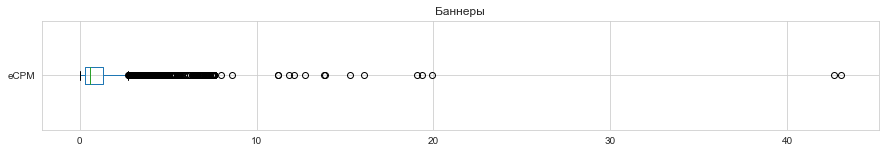

In [23]:
users_banner.boxplot(figsize=(15,2), vert=False,)
plt.title('Баннеры');
users_banner.describe()

In [24]:
np.percentile(users_banner['eCPM'],  [95, 99])#Посчитаем 95-й и 99-й перцентили

array([4.0611655 , 7.35754893])

In [25]:
users_banner = users_banner.query('eCPM < 4.0611655') 
# У 5 % пользователей eCPM более 4.06. Выберем границу в 95%, не более 4.06 отфильтруем выбивающиеся значения

Полноэкранная реклама

,eCPM
count,3962.000000
mean,45.557457
std,46.877344
min,0.000000
25%,17.620615
50%,27.623670
75%,56.397665
max,568.678270


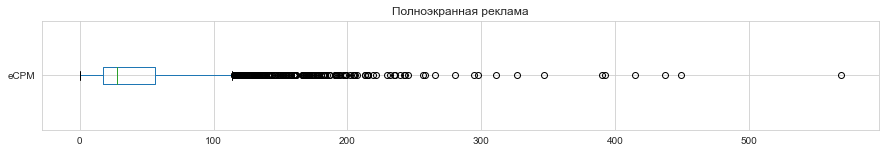

In [26]:
users_int.boxplot(figsize=(15,2), vert=False,)
plt.title('Полноэкранная реклама');
users_int.describe()

In [27]:
np.percentile(users_int['eCPM'],  [95, 99])

array([151.45065643, 198.14260063])

In [28]:
users_int = users_int.query('eCPM < 151.45065643')

Видео

,eCPM
count,1324.000000
mean,80.502004
std,79.154906
min,0.223222
25%,28.240000
50%,46.019935
75%,98.067206
max,808.294820


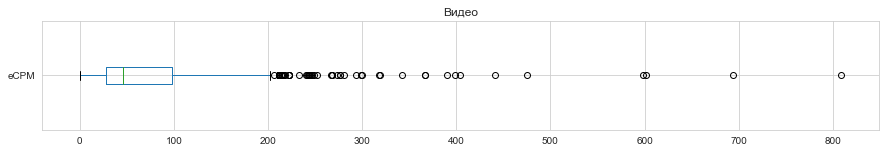

In [29]:
users_rv.boxplot(figsize=(15,2), vert=False,)
plt.title('Видео');
users_rv.describe()

In [30]:
np.percentile(users_rv['eCPM'],  [95, 99])

array([211.7       , 313.34138612])

In [31]:
users_rv = users_rv.query('eCPM < 211.7')

Построим распределение  средних eCPM пользователей по типу рекламы 

In [32]:
users_filtered = pd.concat([users_int, users_banner, users_rv])

In [33]:
users_filtered

,ad_type,profile_id,eCPM
3508,int,JL015rw9vmN,21.983199
3509,int,JL01aCdFTJy,11.965651
3510,int,JL04ODuw9UP,23.160000
3511,int,JL06b4k4ygp,7.327454
3512,int,JL06eD8uPpv,44.820000
...,...,...,...
8788,rv,JMJ94FXDegp,25.164375
8789,rv,JMJNoJcoBUf,103.769158
8791,rv,JMKCFREXspE,7.178189
8792,rv,JMKEonE8xpy,28.240000


,eCPM
ad_type,
rv,55.917103
int,37.571185
banner,0.848512


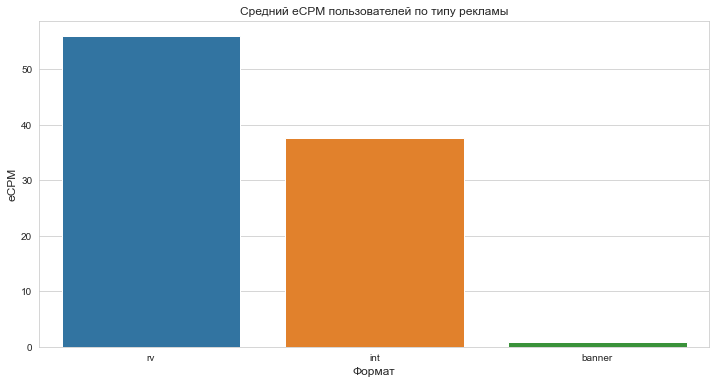

In [34]:
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='ad_type', y='eCPM', data=users_filtered.groupby('ad_type').agg({'eCPM': 'mean'})
            .reset_index().sort_values(by='eCPM', ascending=False))
plt.xlabel('Формат',fontsize=12)
plt.ylabel('eCPM',fontsize=12)
plt.title('Средний eCPM пользователей по типу рекламы');
users_filtered.groupby('ad_type').agg({'eCPM': 'mean'}).sort_values(by='eCPM', ascending=False)

Низкий eCPM баннеров, связан с большим количеством его показов. Высокие показатели по видео и полноэкранной рекламе, связаны с их высокой стоимостью их показа. Об эффективности того или иного вида рекламы сказать ничего нельзя.  

### Распределение eCPM по городам, версиям ОС

Обернем все в функции

In [35]:
def dist(df):
    plt.figure(figsize = (12,6))
    sns.set_style("whitegrid") 
    sns.distplot(df.query('ad_type == "int"')['eCPM'], color='red')
    plt.title('Полноэкранная реклама')
    plt.legend(['int'])
    plt.show()
    plt.figure(figsize = (12,6))
    sns.set_style("whitegrid") 
    sns.distplot(df.query('ad_type == "rv"')['eCPM'], color='blue')
    plt.title('Видео')
    plt.legend(['rv'])
    plt.show()
    plt.figure(figsize = (12,6))
    sns.set_style("whitegrid") 
    sns.distplot(df.query('ad_type == "banner"')['eCPM'], color='green')
    plt.title('Горизонтальный баннер')
    plt.legend(['banner'])
    plt.show()  #функция для отображения distplot по форматам рекламы

In [36]:
def filtered(df):
    perc_int = np.percentile(df.query('ad_type == "int"')['eCPM'],  [95, 99])[0]
    int_ = df.query('ad_type == "int" and eCPM < @perc_int')
    perc_ban = np.percentile(df.query('ad_type == "banner"')['eCPM'],  [95, 99])[0]
    ban = df.query('ad_type == "banner" and eCPM < @perc_ban')
    perc_rv = np.percentile(df.query('ad_type == "rv"')['eCPM'],  [95, 99])[0]
    rv = df.query('ad_type == "rv" and eCPM < @perc_rv')
    filtered = pd.concat([int_, ban, rv])
    return filtered #функция для фильтрации по 95-у перцентилю по форматам рекламы

In [37]:
def mean_eCPM(df):
    fig = plt.subplots(figsize=[12,6])
    sns.barplot(x='ad_type', y='eCPM', data=df.groupby('ad_type').agg({'eCPM': 'mean'})
            .reset_index().sort_values(by='eCPM', ascending=False))
    plt.xlabel('Формат',fontsize=12)
    plt.ylabel('eCPM',fontsize=12)
    plt.title('Средний eCPM');
    display(df.groupby('ad_type').agg({'eCPM': 'mean'}).reset_index().sort_values(by='eCPM', ascending=False))
#функция для отображения среднего eCPM по форматам рекламы

#### Распределение eCPM по городам

In [38]:
cities = (combined.groupby(['ad_type', 'city'])
         .agg({'revenue': 'mean'})*1000).reset_index().rename(columns={'revenue': 'eCPM'})
cities.sample(3)#сгруппируем по формату и городам

,ad_type,city,eCPM
2161,rv,Wesley Chapel,149.754339
1163,int,Greenfield,16.048127
63,banner,Bethel Park,1.082849


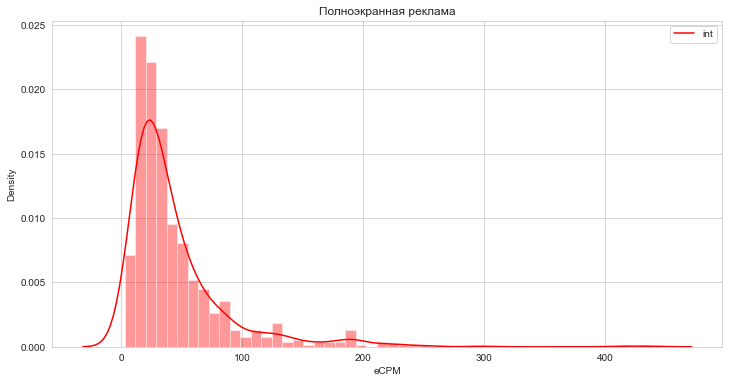

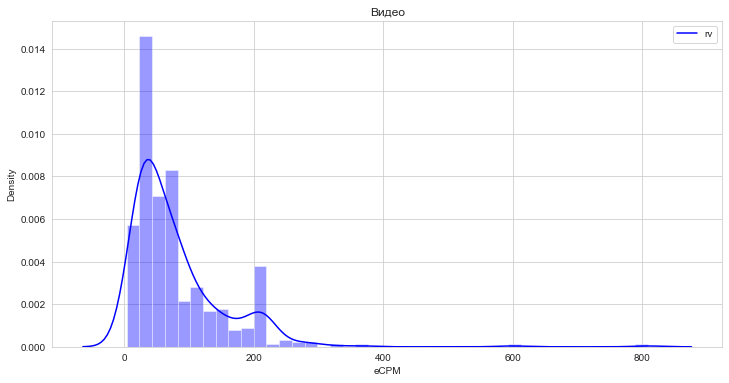

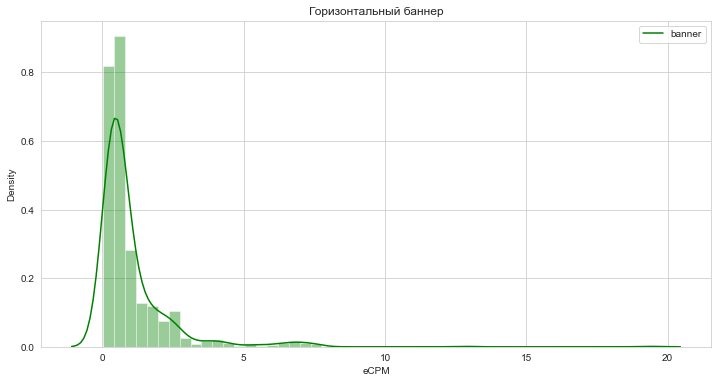

In [39]:
dist(cities)

,eCPM
count,856.000000
mean,1.026122
std,1.439121
min,0.029317
25%,0.342273
50%,0.568364
75%,1.088064
max,19.326435


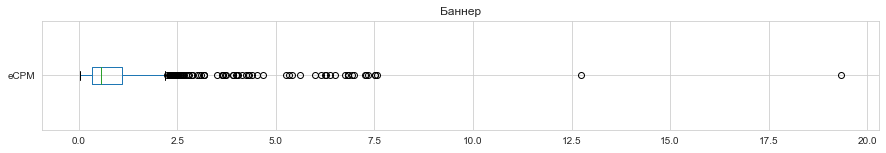

In [40]:
cities.query('ad_type == "banner"').boxplot(figsize=(15,2), vert=False,)
plt.title('Баннер');
cities.query('ad_type == "banner"').describe()

,eCPM
count,869.000000
mean,44.829423
std,44.671766
min,2.750576
25%,19.411409
50%,31.001778
75%,52.142344
max,437.039882


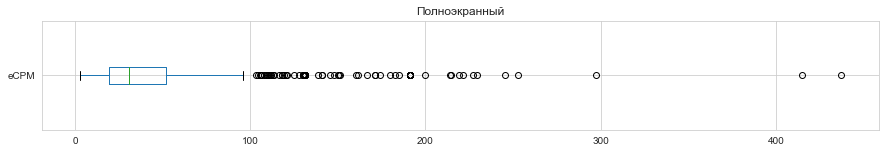

In [41]:
cities.query('ad_type == "int"').boxplot(figsize=(15,2), vert=False,)
plt.title('Полноэкранный');
cities.query('ad_type == "int"').describe()

,eCPM
count,454.000000
mean,80.532356
std,76.601650
min,3.339551
25%,28.240000
50%,55.959567
75%,104.940871
max,808.294820


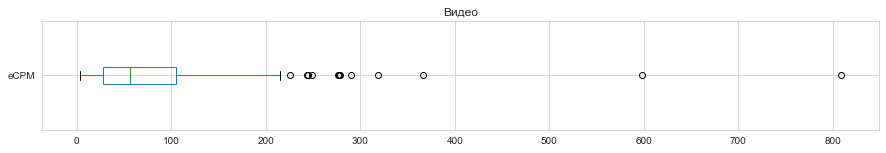

In [42]:
cities.query('ad_type == "rv"').boxplot(figsize=(15,2), vert=False,)
plt.title('Видео');
cities.query('ad_type == "rv"').describe()

In [43]:
cities_filtered = filtered(cities)

,ad_type,eCPM
2,rv,62.086443
1,int,36.736462
0,banner,0.765397


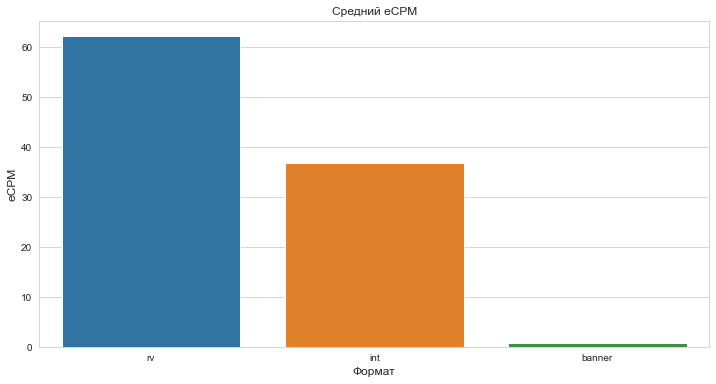

In [44]:
mean_eCPM(cities_filtered) 

Общая картина распределения по городам такая же, как и по пользователям. Относительные значения по сравнению с разбивкой по  пользователям немного отличаются.

#### Распределение eCPM по версиям ОС

In [45]:
OS = (combined.groupby(['ad_type', 'os_version'])
         .agg({'revenue': 'mean'})*1000).reset_index().rename(columns={'revenue': 'eCPM'})
OS.head()

,ad_type,os_version,eCPM
0,banner,10,0.591274
1,banner,11,0.592766
2,banner,12,0.936871
3,banner,5.0.2,0.198288
4,banner,6.0.1,0.254481


,eCPM
count,11.000000
mean,24.491810
std,10.732331
min,11.964031
25%,16.331947
50%,20.030134
75%,32.342557
max,42.391070


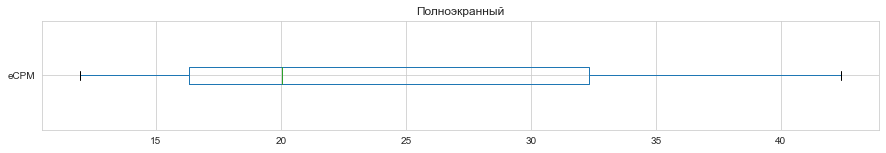

In [46]:
OS.query('ad_type == "int"').boxplot(figsize=(15,2), vert=False,)
plt.title('Полноэкранный');
OS.query('ad_type == "int"').describe()

,eCPM
count,11.000000
mean,0.406479
std,0.236609
min,0.144868
25%,0.245311
50%,0.320697
75%,0.570414
max,0.936871


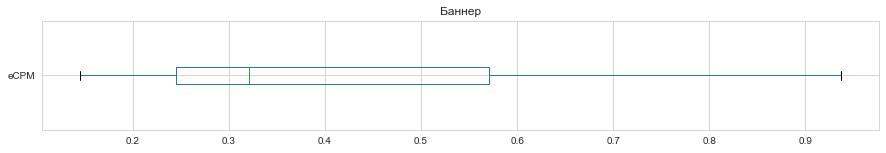

In [47]:
OS.query('ad_type == "banner"').boxplot(figsize=(15,2), vert=False,)
plt.title('Баннер');
OS.query('ad_type == "banner"').describe()

,eCPM
count,10.000000
mean,43.413864
std,24.529849
min,9.191038
25%,26.119036
50%,44.383102
75%,53.368374
max,79.662468


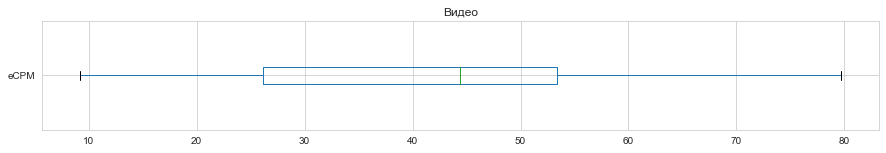

In [48]:
OS.query('ad_type == "rv"').boxplot(figsize=(15,2), vert=False,)
plt.title('Видео');
OS.query('ad_type == "rv"').describe()

In [49]:
OS.query('ad_type == "rv"')['os_version'].value_counts().sort_values()

10       1
11       1
12       1
5.0.2    1
6.0.1    1
7.0      1
7.1.1    1
8.0.0    1
8.1.0    1
9        1
Name: os_version, dtype: int64

In [50]:
OS.query('ad_type == "banner"')['os_version'].value_counts().sort_values()

10       1
11       1
12       1
5.0.2    1
6.0.1    1
7.0      1
7.1.1    1
7.1.2    1
8.0.0    1
8.1.0    1
9        1
Name: os_version, dtype: int64

Аномалий нет. В формате видео рекламы отсутсвует ситема ОС 7.1.2. 

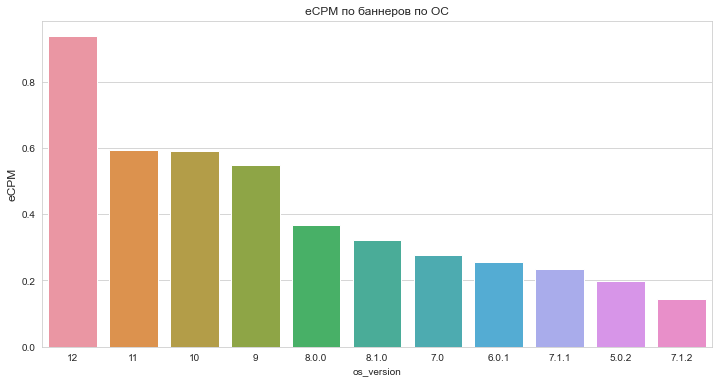

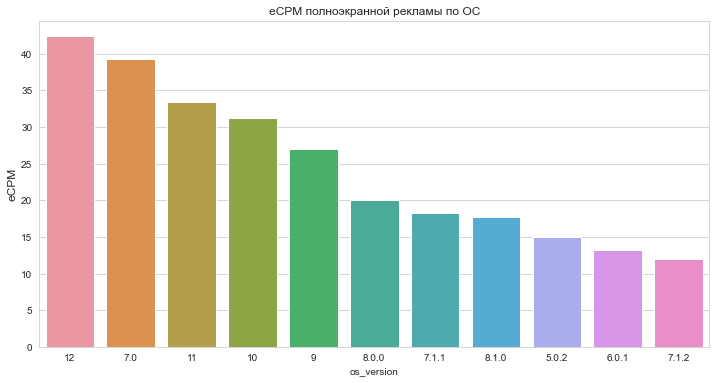

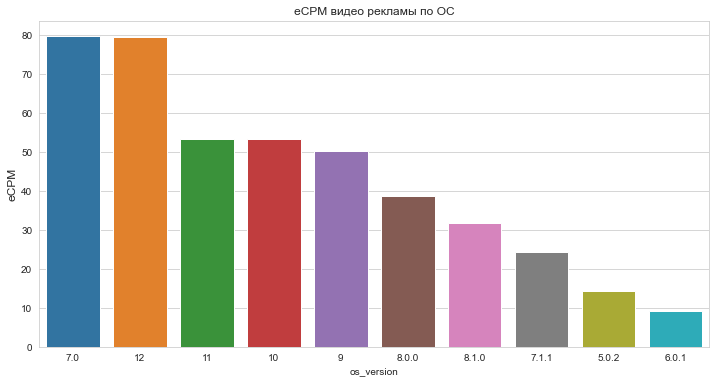

In [51]:
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='eCPM', data=OS.query('ad_type == "banner"').sort_values(by='eCPM', ascending=False))
plt.ylabel('eCPM',fontsize=12)
plt.title('eCPM по баннеров по ОС')
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='eCPM', data=OS.query('ad_type == "int"').sort_values(by='eCPM', ascending=False))
plt.ylabel('eCPM',fontsize=12)
plt.title('eCPM полноэкранной рекламы по ОС')
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='eCPM', data=OS.query('ad_type == "rv"').sort_values(by='eCPM', ascending=False))
plt.ylabel('eCPM',fontsize=12)
plt.title('eCPM видео рекламы по ОС');

Чем новее система тем больше eCPM, примечательно первое и второе место 7.0 версии по видео и полноэкранной рекламе. Видео реклама скорее всего не подерживается системой ОС версии 7.1.2

### Распределение выручки по городам, версиям ОС

#### Распределение выручки по версии ОС

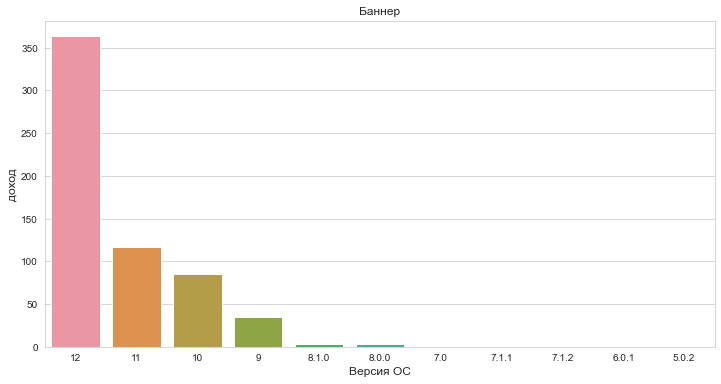

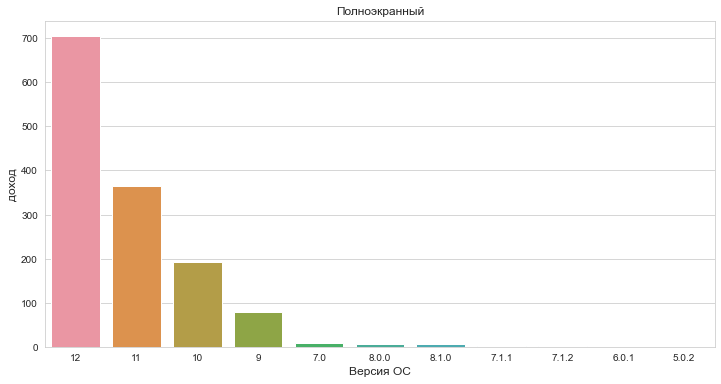

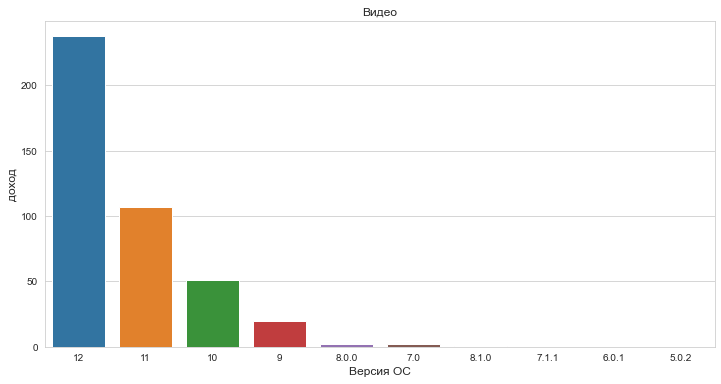

In [52]:
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='revenue', data=combined.query('ad_type == "banner"').groupby('os_version').agg({'revenue': 'sum'})
            .reset_index().sort_values(by='revenue', ascending=False))
plt.xlabel('Версия ОС',fontsize=12)
plt.ylabel('доход',fontsize=12)
plt.title('Баннер')
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='revenue', data=combined.query('ad_type == "int"').groupby('os_version').agg({'revenue': 'sum'})
            .reset_index().sort_values(by='revenue', ascending=False))
plt.xlabel('Версия ОС',fontsize=12)
plt.ylabel('доход',fontsize=12)
plt.title('Полноэкранный')
fig = plt.subplots(figsize=[12,6])
sns.barplot(x='os_version', y='revenue', data=combined.query('ad_type == "rv"').groupby('os_version').agg({'revenue': 'sum'})
            .reset_index().sort_values(by='revenue', ascending=False))
plt.xlabel('Версия ОС',fontsize=12)
plt.ylabel('доход',fontsize=12)
plt.title('Видео');

Большую часть дохода приносят юзеры с последними версиями ОС

#### Распределение выручки по городам

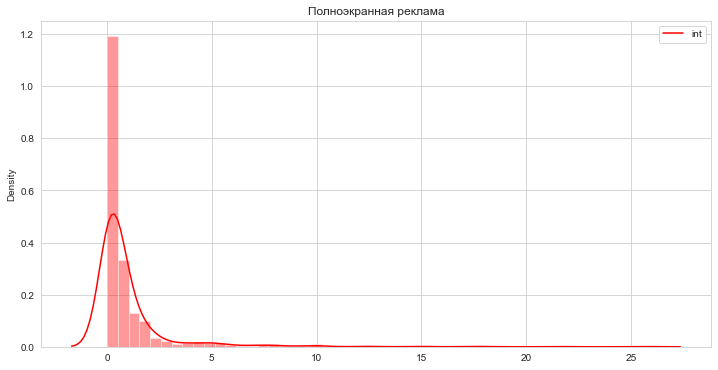

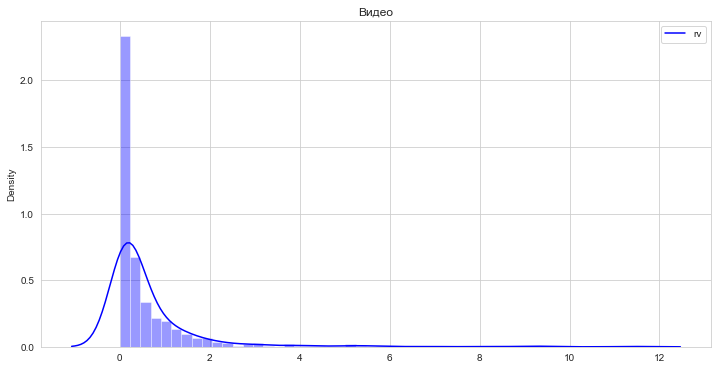

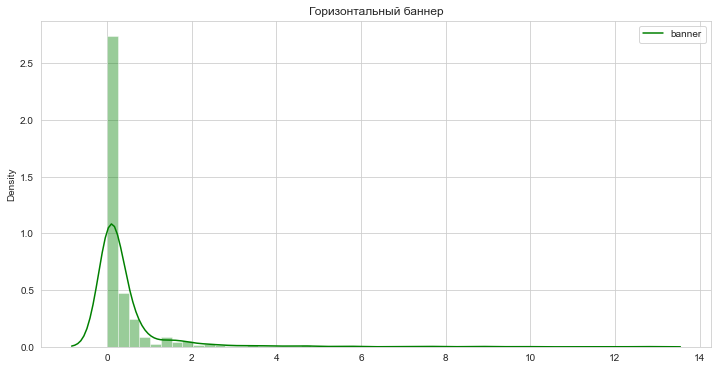

In [53]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(combined.query('ad_type == "int"').groupby('city').agg({'revenue': 'sum'}), color='red')
plt.title('Полноэкранная реклама')
plt.legend(['int'])
plt.show()
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(combined.query('ad_type == "rv"').groupby('city').agg({'revenue': 'sum'}), color='blue')
plt.title('Видео')
plt.legend(['rv'])
plt.show()
plt.figure(figsize = (12,6))
sns.set_style("whitegrid") 
sns.distplot(combined.query('ad_type == "banner"').groupby('city').agg({'revenue': 'sum'}), color='green')
plt.title('Горизонтальный баннер')
plt.legend(['banner'])
plt.show()

### Распределения еCPM по времени дня

In [54]:
combined['hour']= pd.to_datetime(combined['event_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

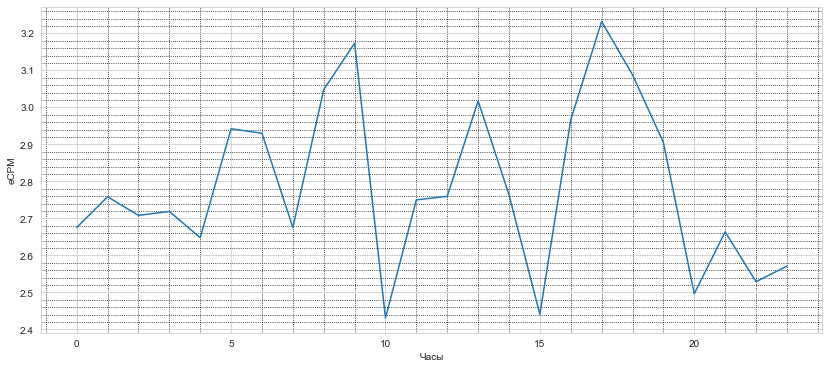

In [55]:
plt.figure(figsize = (14,6))
plt.plot((combined.groupby(['hour']).agg({'revenue': 'mean'})*1000).rename(columns={'revenue': 'eCPM'}))
plt.xlabel('Часы')
plt.ylabel('eCPM')
plt.minorticks_on()
plt.grid(True, which='minor', color = 'k', linestyle = ':')
plt.show()

График сгруппирован по часам и не учитывает выходные дни и праздники. По графику можно сказать что активность пользователей связана с рабочим расписанием.

# Вывод

В данном исследование мы изучили средние eCPM по форматам рекламы с разбивкой по пользователям, городам, ОС, отфильтровав аномальные, выбивающиеся значения. Выяснили что самый высокий показатель eCPM, с разбивкой по юзерам и городам у видео рекламы, самый низкий у баннеров. Видео реклама, скорее всего не подерживается системой ОС версии 7.1.2. Большую часть дохода приносят юзеры с последними версиями ОС, версия 7.0 ОС имеет необычно высокий eCPM в полноэкранном и видео формате. Также выяснили что 62.363% доходов содержат информацию о городе юзера и что активность пользователей связана с рабочим расписанием.